In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import numpy as np
import scipy as sp
import sys
#import pycountry

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image


import nltk
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import RegexpStemmer
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


In [2]:
df=pd.read_csv("turkish_movie_sentiment_dataset.csv")

In [3]:
df.head()

,comment,film_name,point
0,\n Jean Reno denince zate...,Sevginin Gücü,"5,0"
1,\n Ekşın falan izlemek is...,Sevginin Gücü,"5,0"
2,\n Bu yapım hakkında öyle...,Sevginin Gücü,"5,0"
3,\n finali yeter... (sting...,Sevginin Gücü,"5,0"
4,\n Jean Reno..\r\nbu adam...,Sevginin Gücü,"5,0"


In [4]:
df.tail()

,comment,film_name,point
83222,"\n Böyle bi kadrodan, bçy...",Kabus,"2,5"
83223,\n yani bu kaar ii oyunca...,Kabus,"2,5"
83224,\n bugün dvd'sini alıp iz...,Kabus,"1,0"
83225,\n Klasik korku ve gerili...,Kabus,"4,0"
83226,\n Bence gereğinden fazla...,Bir Zamanlar... Hollywood'da,"4,6"


In [40]:
df.sample(10)

,point,sentiment,comment,polarity,subjectivity,tokenized
24478,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[birinci, film, kadar, heyecanlı, ve, güzel, o..."
20053,3.0,nötr,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[ağır, temposu, eşliğinde, dakikalık, bir, sür..."
22876,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[herkesin, izlemesi, ders, alması, gereken, bi..."
22731,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[seslandirmeler, süper, olmuş, özellikle, seza..."
15199,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[dün, akşam, filmin, galasındaydımbeyazperdeni..."
64694,3.0,nötr,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[filmdeki, oyuncu, kadrosuna, bakılınca, komed..."
64465,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[mutlaka, izleyeceğim]"
18205,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[luis, bunuelbir, endülüs, köpeğialtın, çağmah..."
43253,3.0,nötr,"[ , , , , , , , , , , , , , , , ...",0.0,0.1,"[sıkılmadan, izleyebileceğiniz, bir, film, ben..."
1122,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[hayatımda, iizlediğim, filmler, arasına, bodo..."


In [6]:
df.shape

(83227, 3)

In [7]:
df.describe()

,comment,film_name,point
count,83227,83227,83227
unique,82456,7722,16
top,\n \n,Kapan,"4,0"
freq,300,92,19958


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83227 entries, 0 to 83226
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    83227 non-null  object
 1   film_name  83227 non-null  object
 2   point      83227 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [9]:
df.isnull().sum()

comment      0
film_name    0
point        0
dtype: int64

In [10]:
df["film_name"].value_counts()

Kapan                            92
Köstebek                         76
Cinnet                           64
Deney                            61
Şüphe                            54
                                 ..
Drakula: Ölü ve Mutlu             1
Karlar Kraliçesi 2                1
Kursk                             1
Gassal                            1
Max Maceraları: Kralın Doğuşu     1
Name: film_name, Length: 7722, dtype: int64

In [11]:
df["point"].value_counts()

4,0    19958
5,0    15873
2,5    11433
3,5     8565
4,5     6983
3,0     5499
0,5     5150
1,0     4917
2,0     2433
1,5     1464
4,6      522
3,9      211
3,8      100
3,7       55
3,2       38
3,1       26
Name: point, dtype: int64

<AxesSubplot:>

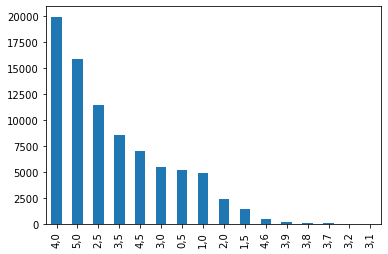

In [12]:
df.point.value_counts().plot.bar()

In [13]:
floatize = lambda x : float(x[0:-2])

df["point"] = df["point"].apply(floatize)
df["point"].value_counts()

4.0    27463
5.0    15873
3.0    14494
2.0    13866
1.0     6381
0.0     5150
Name: point, dtype: int64

In [14]:
df.loc[df['point']==3, 'sentiment']= 'nötr'
df.loc[df['point']<3, 'sentiment']= 'negatif'
df.loc[df['point']>3, 'sentiment']= 'pozitif'
df=df[["point", "sentiment", "comment"]]
df.head()

,point,sentiment,comment
0,5.0,pozitif,\n Jean Reno denince zate...
1,5.0,pozitif,\n Ekşın falan izlemek is...
2,5.0,pozitif,\n Bu yapım hakkında öyle...
3,5.0,pozitif,\n finali yeter... (sting...
4,5.0,pozitif,\n Jean Reno..\r\nbu adam...


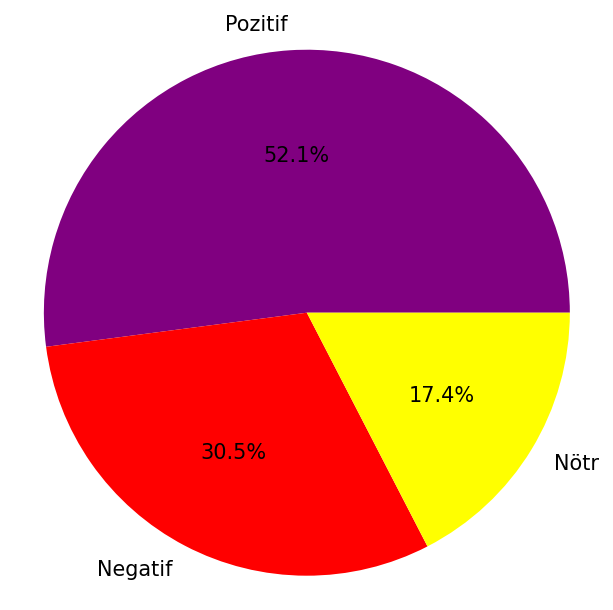

In [15]:
pie_sentiment=df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5), dpi=150),
labels='Pozitif', 'Negatif', 'Nötr'
colors=['purple', 'red', 'yellow']
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct='%1.1f%%')
plt.axis('equal');

<AxesSubplot:xlabel='sentiment', ylabel='count'>

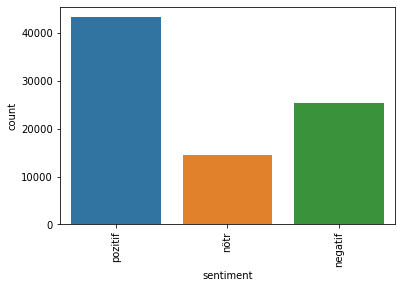

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
sns.countplot(x = df['sentiment'])

In [17]:
df.sentiment.value_counts()

pozitif    43336
negatif    25397
nötr       14494
Name: sentiment, dtype: int64

In [18]:
df.sentiment.value_counts(normalize=True)

pozitif    0.520696
negatif    0.305153
nötr       0.174150
Name: sentiment, dtype: float64

In [19]:
df[['polarity', 'subjectivity']]= df['comment'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [41]:
df

,point,sentiment,comment,polarity,subjectivity,tokenized
0,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.5,1.0,"[jean, reno, denince, zaten, leon, filmi, geli..."
1,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[ekşın, falan, izlemek, istiyorsanız, eğer, bu..."
2,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[bu, yapım, hakkında, öyle, çok, şey, yazabili..."
3,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[finali, yeter, sting, shape, of, my, heartbaz..."
4,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[jean, renobu, adam, kusursuz, birive, oyuncul..."
...,...,...,...,...,...,...
83222,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[böyle, bi, kadrodan, bçyle, bi, film, ne, den..."
83223,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[yani, bu, kaar, ii, oyuncalrın, ve, yönetmeni..."
83224,1.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[bugün, dvdsini, alıp, izledim, ama, inanılmaz..."
83225,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[klasik, korku, ve, gerilim]"


<AxesSubplot:xlabel='point', ylabel='count'>

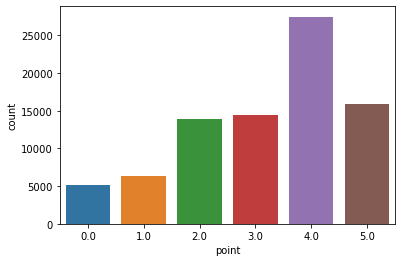

In [21]:
sns.countplot(x=df['point']) 

In [22]:
def create_wordcloud(comment):
    mask = np.array(Image.open("images.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=50000,
                  stopwords=stopwords)
    wc.generate(str(comment))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


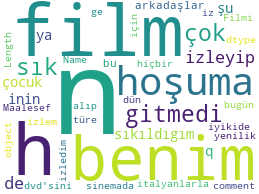

In [23]:
comment1=df[df["point"]==1.0]
create_wordcloud(comment1.comment)

Word Cloud Saved Successfully


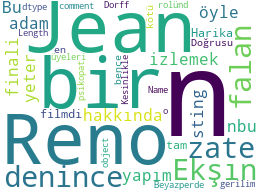

In [24]:
comment5=df[df["point"]==5.0]
create_wordcloud(comment5.comment)

In [25]:
df['comment']=df['comment'].str.lower()                 #bütün sütunu küçük harfe çevirir
df['comment']=df['comment'].str.replace('[^\w\s]','')   #noktalama işaretlerini kaldırır
df['comment']=df['comment'].str.replace('[\d+]','')     #rakamları kaldırır
df['comment']=df['comment'].str.replace('[\n]','')      #yeni satırları kaldırır
df['comment']=df['comment'].str.replace('[\r]','')      # enter kaldırı

In [39]:
df.sample(20)

,point,sentiment,comment,polarity,subjectivity,tokenized
30054,3.0,nötr,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[fragmanında, gülmüştüm, filmden, beklentim, a..."
35998,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[gerçekten, güzel, ama, daha, iyi, olabilirdif..."
63767,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[konu, olarak, iyiye, benziyor, derken, gene, ..."
69244,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[az, önce, izledim, filmi, çok, etkileyici, sa..."
25558,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.000000,1.000000,"[spielbergin, filmleri, her, zaman, kiyisindan..."
43609,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[merhaba, filmi, nasıl, izleriz, hiç, bir, yer..."
2047,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[bence, cok, seyirlik, eglencelik, bır, fılm, ..."
791,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[filmde, her, iki, konuyu, çok, iyi, yorumlamı..."
70566,0.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[komik, kısımları, olmasına, karşın, çok, boş,..."
82935,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.000000,0.000000,"[yaşananlarla, yapımcılığın, ne, alakası, var,..."


In [38]:
df["comment"][522]    #522. yorum


[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'b',
 'u',
 ' ',
 'f',
 'i',
 'l',
 'm',
 'i',
 'n',
 ' ',
 'i',
 'z',
 'm',
 'i',
 'r',
 'd',
 'e',
 ' ',
 'ş',
 'e',
 'h',
 'r',
 'i',
 'n',
 ' ',
 'e',
 'n',
 ' ',
 'u',
 'z',
 'a',
 'k',
 ' ',
 'n',
 'k',
 't',
 'a',
 'l',
 'a',
 'r',
 'ı',
 'n',
 'd',
 'a',
 ' ',
 'v',
 'e',
 ' ',
 's',
 'a',
 'd',
 'e',
 'c',
 'e',
 ' ',
 ' ',
 's',
 'a',
 'l',
 'n',
 'd',
 'a',
 ' ',
 'g',
 'ö',
 's',
 't',
 'e',
 'r',
 'i',
 'l',
 'i',
 'y',
 ' ',
 'l',
 'm',
 'a',
 's',
 'ı',
 ' ',
 'ç',
 'k',
 ' ',
 'y',
 'a',
 'z',
 'ı',
 'k',
 ' ',
 ' ',
 'b',
 'i',
 'r',
 'b',
 'i',
 'r',
 'i',
 'n',
 'e',
 ' ',
 'y',
 'a',
 'k',
 'ı',
 'n',
 ' ',
 'b',
 'i',
 'r',
 'ç',
 'k',
 ' ',
 's',
 'a',
 'l',
 'n',
 'd',
 'a',
 ' ',
 'n',
 'e',
 'r',
 'e',
 'd',
 'e',
 'y',
 's',
 'e',
 ' ',
 'a',
 'y',
 'n',
 'ı',
 ' ',
 'f',
 'i',
 'l',
 'm',
 'l',
 'e',
 'r',
 ' ',
 'g',
 'ö',
 's'

In [28]:
df["point"][522]     #522.yoruma verilen puan

4.0

## Tokenize

In [29]:
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['comment'].values]

In [37]:
df["comment"]

0        [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
1        [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
2        [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3        [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
4        [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
                               ...                        
83222    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
83223    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
83224    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
83225    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
83226    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
Name: comment, Length: 83227, dtype: object

## Stopwords

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarıkaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
stopwords= nltk.corpus.stopwords.words('turkish')

In [33]:
df['comment']=df['comment'].apply(lambda x: [word for word in x if word not in stopwords])

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarıkaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Clasification

In [35]:
#!pip install tensorflow

In [36]:
df

,point,sentiment,comment,polarity,subjectivity,tokenized
0,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.5,1.0,"[jean, reno, denince, zaten, leon, filmi, geli..."
1,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[ekşın, falan, izlemek, istiyorsanız, eğer, bu..."
2,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[bu, yapım, hakkında, öyle, çok, şey, yazabili..."
3,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[finali, yeter, sting, shape, of, my, heartbaz..."
4,5.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[jean, renobu, adam, kusursuz, birive, oyuncul..."
...,...,...,...,...,...,...
83222,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[böyle, bi, kadrodan, bçyle, bi, film, ne, den..."
83223,2.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[yani, bu, kaar, ii, oyuncalrın, ve, yönetmeni..."
83224,1.0,negatif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[bugün, dvdsini, alıp, izledim, ama, inanılmaz..."
83225,4.0,pozitif,"[ , , , , , , , , , , , , , , , ...",0.0,0.0,"[klasik, korku, ve, gerilim]"
